<a href="https://colab.research.google.com/github/thanatkat/E-Commerce-Data-EDA/blob/main/E_Commerce_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Data

Dataset: https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [1]:
# import 
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

In [28]:
# read csv file
df = pd.read_csv("data.csv", encoding= 'unicode_escape')

In [29]:
# change InvoiceDate object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
# view data head
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412977 entries, 0 to 412976
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    412977 non-null  object        
 1   StockCode    412977 non-null  object        
 2   Description  411634 non-null  object        
 3   Quantity     412976 non-null  float64       
 4   InvoiceDate  412976 non-null  datetime64[ns]
 5   UnitPrice    412976 non-null  float64       
 6   CustomerID   308494 non-null  float64       
 7   Country      412976 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 25.2+ MB


In [33]:
# drop the duplicate row
df.drop_duplicates(inplace=True)

In [35]:
# check missing value
# Description, CustomerID have non-value 
df.count()

InvoiceNo      409590
StockCode      409590
Description    408247
Quantity       409589
InvoiceDate    409589
UnitPrice      409589
CustomerID     305143
Country        409589
dtype: int64

In [36]:
# show only rows having non value
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

       InvoiceNo StockCode                        Description  Quantity  \
622       536414     22139                                NaN      56.0   
1443      536544     21773    DECORATIVE ROSE BATHROOM BOTTLE       1.0   
1444      536544     21774    DECORATIVE CATS BATHROOM BOTTLE       2.0   
1445      536544     21786                 POLKADOT RAIN HAT        4.0   
1446      536544     21787              RAIN PONCHO RETROSPOT       2.0   
...          ...       ...                                ...       ...   
411020    572190     23209           LUNCH BAG VINTAGE DOILY        1.0   
411021    572190     20727            LUNCH BAG  BLACK SKULL.       1.0   
411022    572190     23027  DRAWER KNOB VINTAGE GLASS HEXAGON       1.0   
411896    572239    84247E                                NaN       1.0   
412976    572302    84997C                   CHILDRENS CUTLER       NaN   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00     

In [37]:
# replace null value in CustomerID with '00000'
df['CustomerID'].fillna('00000', inplace=True)

In [38]:
# fill in missing Description using StockCode
df['Description'] = df.groupby('StockCode')['Description'].fillna(method='ffill')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409590 entries, 0 to 412976
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    409590 non-null  object        
 1   StockCode    409590 non-null  object        
 2   Description  409406 non-null  object        
 3   Quantity     409589 non-null  float64       
 4   InvoiceDate  409589 non-null  datetime64[ns]
 5   UnitPrice    409589 non-null  float64       
 6   CustomerID   409590 non-null  object        
 7   Country      409589 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 28.1+ MB


In [40]:
# Some StockCodes are not match with Description
# Put 'Unknown' to missing values on Description column
df['Description'].fillna('Unknown', inplace=True)

In [14]:
# check again
df.sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38235,539492,85131B,BEADED CRYSTAL HEART GREEN ON STICK,1,2010-12-20 10:14:00,0.85,00000,United Kingdom
33815,539296,84846A,SCENTED CANDLE IN DIGITALIS TIN,6,2010-12-16 17:01:00,2.10,16816.0,United Kingdom
51247,540646,21222,SET/4 BADGES BEETLES,1,2011-01-10 14:32:00,0.85,00000,United Kingdom
30456,538866,21479,WHITE SKULL HOT WATER BOTTLE,30,2010-12-14 14:40:00,3.39,17841.0,United Kingdom
62265,541497,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,2,2011-01-18 15:19:00,1.63,00000,United Kingdom
40669,539740,22385,JUMBO BAG SPACEBOY DESIGN,1,2010-12-21 15:20:00,5.06,00000,United Kingdom
54038,540848,40001,WHITE BAMBOO RIBS LAMPSHADE,1,2011-01-12 09:26:00,1.66,00000,United Kingdom
2784,536592,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2010-12-01 17:06:00,5.91,00000,United Kingdom
18397,537823,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1,2010-12-08 14:25:00,4.21,00000,United Kingdom
46522,540354,21755,LOVE BUILDING BLOCK WORD,6,2011-01-06 14:58:00,5.95,13576.0,United Kingdom


In [41]:
# count the number of rows with negative values in the Quantity column
count = (df['Quantity'] < 0).sum()
print(count)

8677


In [42]:
# I assume negative values in the Quantity are the ones which were cancelled
# remove rows with negative Quantity values
df = df[df['Quantity'] >= 0]

In [43]:
# check again
count = (df['Quantity'] < 0).sum()
print(count)

0


In [46]:
# new column
df['TotalRevenue'] = df['UnitPrice'] * df['Quantity']

In [47]:
# export dataframe to csv
df.to_csv('ecommerce_data.csv')

**EDA**

In [20]:
# The most popular product
popular_product = df['Description'].value_counts().head(10)
print(popular_product)

WHITE HANGING HEART T-LIGHT HOLDER    334
REGENCY CAKESTAND 3 TIER              248
HEART OF WICKER SMALL                 213
HAND WARMER BABUSHKA DESIGN           203
SCOTTIE DOG HOT WATER BOTTLE          200
JAM MAKING SET PRINTED                194
JUMBO BAG RED RETROSPOT               191
CHOCOLATE HOT WATER BOTTLE            180
PAPER CHAIN KIT 50'S CHRISTMAS        177
RETROSPOT HEART HOT WATER BOTTLE      171
Name: Description, dtype: int64


In [21]:
# Total Revenue
total_revenue = df['TotalRevenue'].sum()
print("Total revenue:", total_revenue)

Total revenue: 1269864.0300000003


In [22]:
# Average order size
avg_order = df.groupby('InvoiceNo')['TotalRevenue'].sum().mean()
print("Average order size:", avg_order)

Average order size: 569.1905109816227


In [23]:
# Calculate the total revenue by day
revenue_by_day = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['TotalRevenue'].sum()
print(revenue_by_day)

InvoiceDate
2010-12-01    58776.79
2010-12-02    47629.42
2010-12-03    46898.63
2010-12-04        0.00
2010-12-05    31364.63
2010-12-06    54624.15
2010-12-07    99553.85
2010-12-08    45235.36
2010-12-09    53548.19
2010-12-10    59021.02
2010-12-11        0.00
2010-12-12    17125.65
2010-12-13    37942.37
2010-12-14    45167.56
2010-12-15    30384.37
2010-12-16    49114.14
2010-12-17    45338.13
2010-12-18        0.00
2010-12-19     7410.47
2010-12-20    26766.23
2010-12-21    47279.89
2010-12-22     6199.97
2010-12-23    12071.91
2010-12-24        0.00
2010-12-25        0.00
2010-12-26        0.00
2010-12-27        0.00
2010-12-28        0.00
2010-12-29        0.00
2010-12-30        0.00
2010-12-31        0.00
2011-01-01        0.00
2011-01-02        0.00
2011-01-03        0.00
2011-01-04    16005.73
2011-01-05    32630.27
2011-01-06    40366.45
2011-01-07    28836.59
2011-01-08        0.00
2011-01-09    15590.68
2011-01-10    24553.07
2011-01-11    68630.54
2011-01-12    24664.58

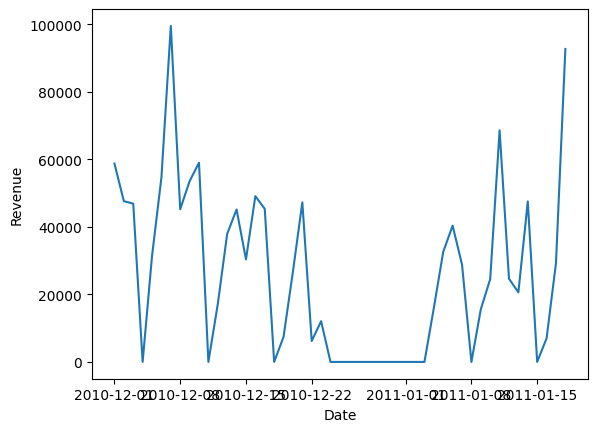

In [48]:
# Plot the revenue by day
plt.plot(revenue_by_day)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [25]:
# Calculate the order count by week
orders_by_week = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['InvoiceNo'].nunique()

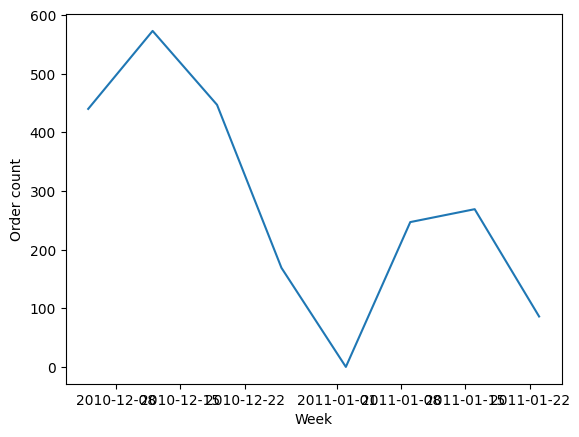

In [26]:
# Plot the order count by week
plt.plot(orders_by_week)
plt.xlabel("Week")
plt.ylabel("Order count")
plt.show()